# Telecom Market Churn Prediction System

Goal:
Predict regional subscriber churn trends to help telecom operators proactively manage network investments, optimize marketing spend, and enhance competitive positioning.

### Library Imports

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Data Loading

In [113]:
path = 'Telecom-Dataset.csv'
df = pd.read_csv(path,low_memory=False)
df.head(5)

,year,month,circle,type_of_connection,service_provider,value,unit,notes
0,2025,April,Andhra Pradesh,wireless,Bharti Airtel (Including Tata Tele.),33965795,value in absolute number,NaN
1,2025,April,Assam,wireless,Bharti Airtel (Including Tata Tele.),12314102,value in absolute number,NaN
2,2025,April,Bihar,wireless,Bharti Airtel (Including Tata Tele.),40967773,value in absolute number,NaN
3,2025,April,Delhi,wireless,Bharti Airtel (Including Tata Tele.),18877637,value in absolute number,NaN
4,2025,April,Gujarat,wireless,Bharti Airtel (Including Tata Tele.),12401101,value in absolute number,NaN


In [114]:
def data_information():
    print("✅ Shape of Data ",df.shape)
    print("="*50)
    print("✅ Information about Data")
    print(df.info())
    print("="*50)
    print("✅ Checking for Null Values")
    print(df.isna().sum())
    print("="*50)
    print("✅ Checking for Duplicates")
    print(df.duplicated().sum())
    print("="*50)
data_information()

✅ Shape of Data  (70728, 8)
✅ Information about Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70728 entries, 0 to 70727
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                70728 non-null  int64 
 1   month               70728 non-null  object
 2   circle              70728 non-null  object
 3   type_of_connection  70728 non-null  object
 4   service_provider    70728 non-null  object
 5   value               58396 non-null  object
 6   unit                70728 non-null  object
 7   notes               511 non-null    object
dtypes: int64(1), object(7)
memory usage: 4.3+ MB
None
✅ Checking for Null Values
year                      0
month                     0
circle                    0
type_of_connection        0
service_provider          0
value                 12332
unit                      0
notes                 70217
dtype: int64
✅ Checking for Duplicates
0


In [115]:
df['value'] = pd.to_numeric(df['value'], errors='coerce')

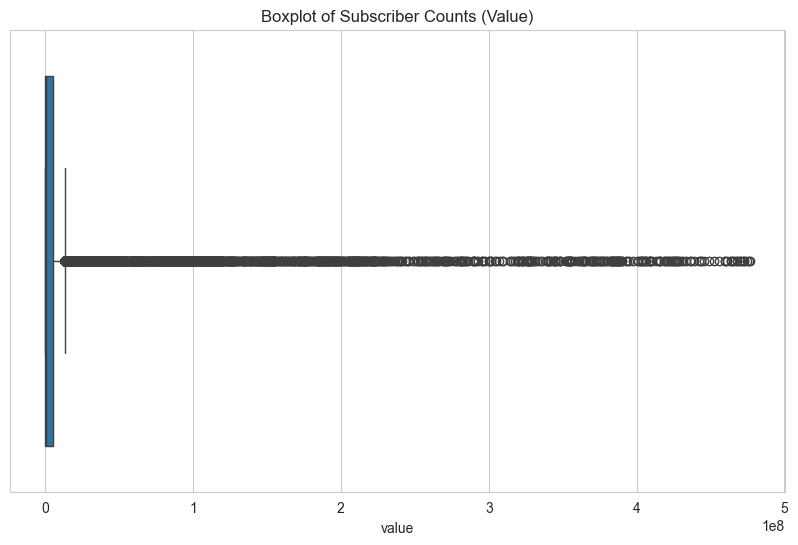

In [116]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['value'])
plt.title('Boxplot of Subscriber Counts (Value)')
plt.show()

In [117]:
# Calculate the 95th percentile
threshold = df['value'].quantile(0.95)

# Cap values above the 95th percentile to the threshold
df['value'] = np.where(df['value'] > threshold, threshold, df['value'])

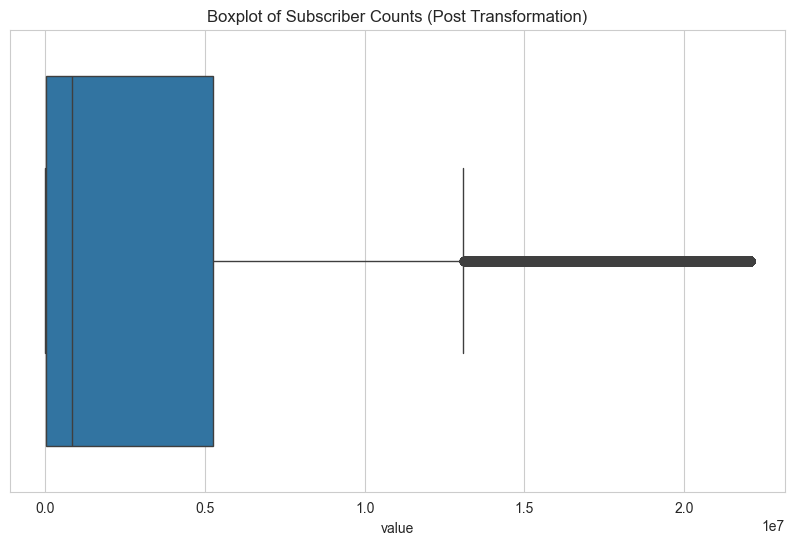

In [118]:
# Plot the boxplot after capping or transformation
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['value'])  # Or use 'value_log' if you've applied log transformation
plt.title('Boxplot of Subscriber Counts (Post Transformation)')
plt.show()

In [119]:
#Basic statistics
print(f'Data range : {df["year"].min()} - {df["year"].max()}')
print(f'Unique operators : {df["service_provider"].nunique()}')
print(f'Unique circles : {df["circle"].nunique()}')
print(f'Subscriber range : {df["value"].min()} to {df["value"].max()}')

Data range : 2009 - 2025
Unique operators : 42
Unique circles : 38
Subscriber range : 0.0 to 22051323.799999937


# Removing missing values


In [120]:
df['value'] = df['value'].fillna(df['value'].median())
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%B')
df.set_index('date', inplace=True)
df = df.reset_index() # Reset index here
df.drop(['notes', 'unit'], axis=1, inplace=True, errors='ignore')

# Visualizations

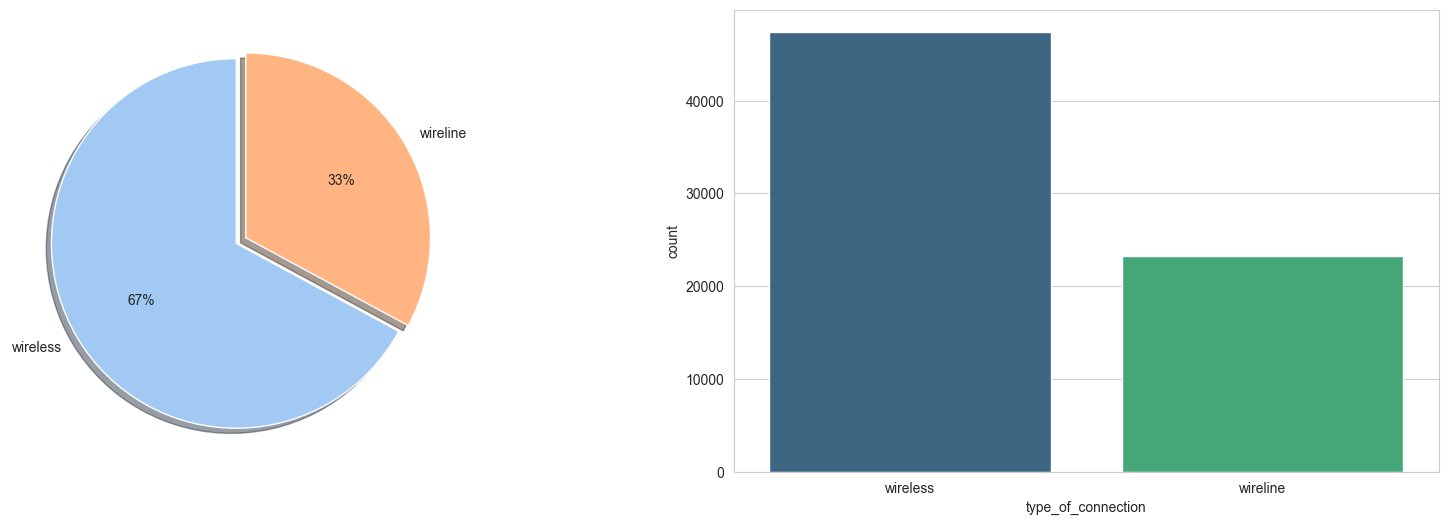

In [121]:
colors=sns.color_palette("pastel",2)
fig,ax=plt.subplots(1,2,figsize=(20,6))
ax[0].pie(df["type_of_connection"].value_counts(),autopct="%1.0f%%",labels=df["type_of_connection"].unique(),
        explode=[0.03,0.03],startangle=90,shadow=True,colors=colors)
sns.countplot(data=df,x="type_of_connection", hue="type_of_connection", palette="viridis", ax=ax[1], legend=False)
plt.show()

# Total Telecom Subscriptions in India Over Time

What the Plot Shows
This visualization is a line graph that maps the total number of telecom subscriptions across India over a specific period. The horizontal axis (the x-axis) represents time, chronologically ordered from the earliest date in the dataset to the most recent. The vertical axis (the y-axis) quantifies the aggregate number of subscriptions, likely in tens of millions, providing a clear scale of the market size.

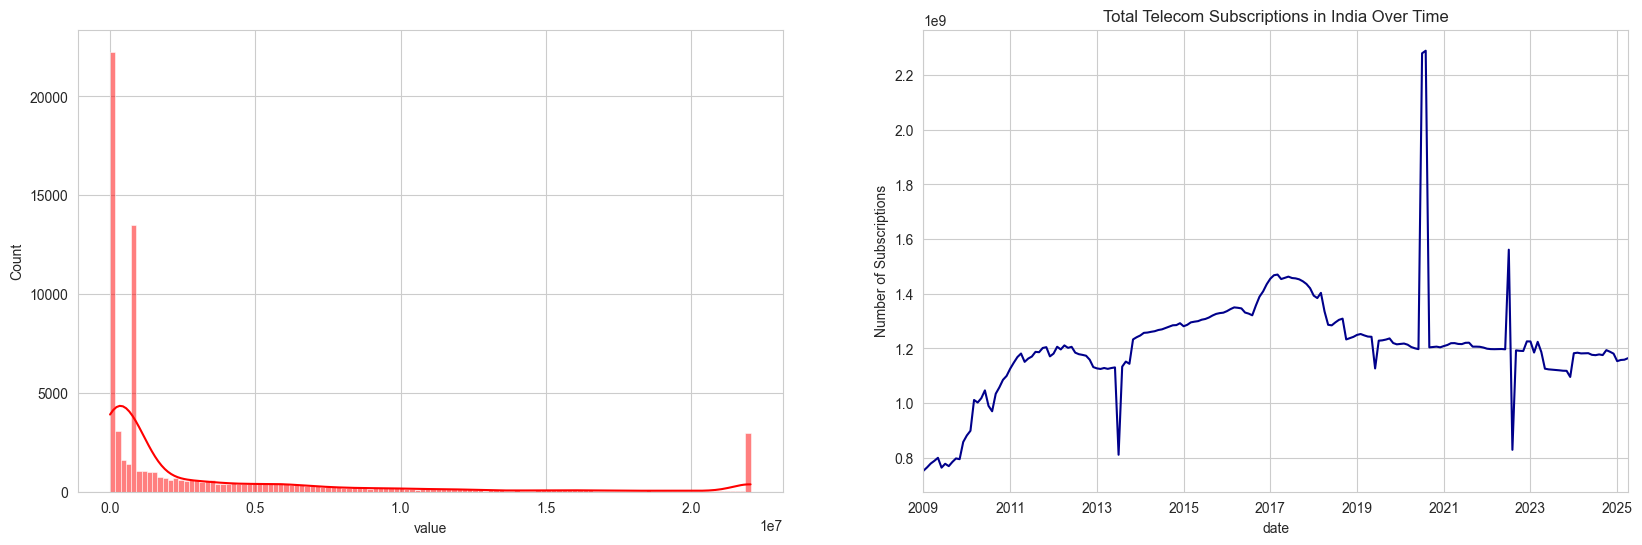

In [122]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
sns.histplot(data=df,x="value",kde=True,color="red",ax=ax[0])
total_subscriptions = df.groupby('date')['value'].sum()
total_subscriptions.plot(title='Total Telecom Subscriptions in India Over Time', color='darkblue')
plt.ylabel('Number of Subscriptions')
plt.show()

# Wireless vs. Wireline Subscriptions Over Time
What the Plot Shows
This line chart provides a comparative analysis of the two primary modes of telecom connection: wireless (mobile) and wireline (landline). Similar to the previous chart, the x-axis represents the passage of time. However, the y-axis here simultaneously tracks the number of subscriptions for both categories.

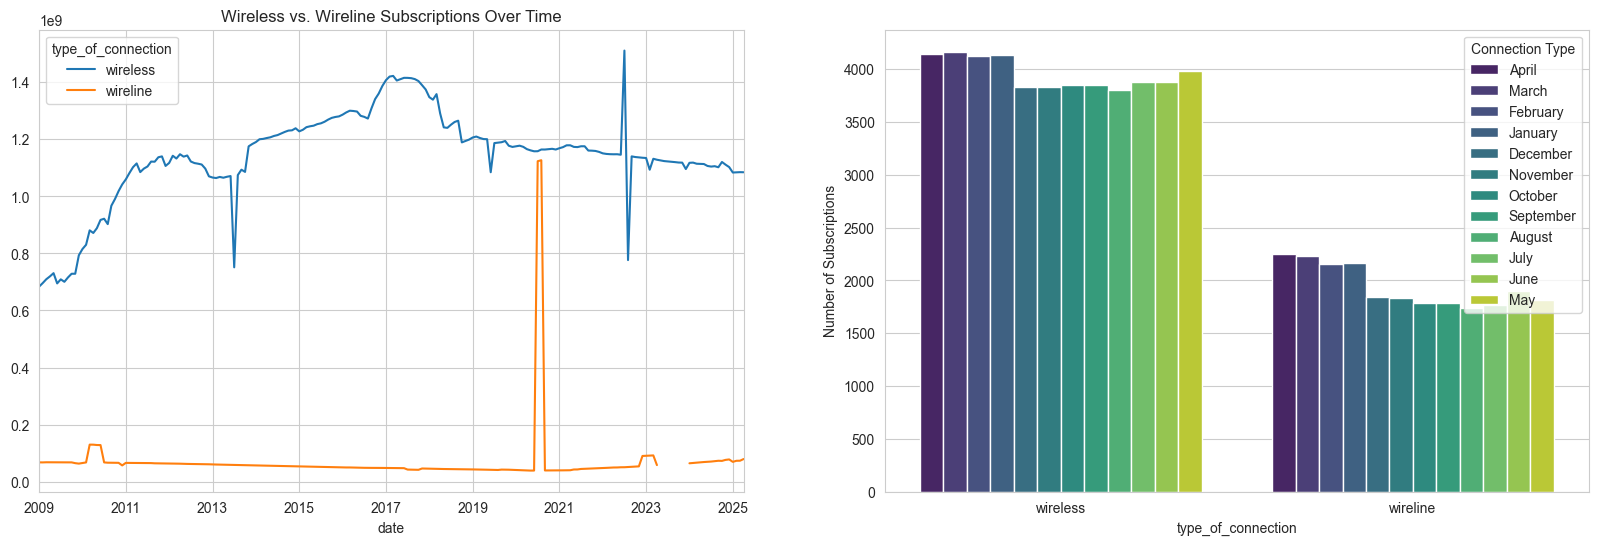

In [123]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
subscriptions_by_type = df.groupby(['date', 'type_of_connection'])['value'].sum().unstack()
subscriptions_by_type.plot(kind='line', stacked=False, title='Wireless vs. Wireline Subscriptions Over Time',ax=ax[0])
sns.countplot(data=df,x="type_of_connection",hue="month",palette="viridis",ax=ax[1])
plt.ylabel('Number of Subscriptions')
plt.legend(title='Connection Type')
plt.show()

# Top 10 Service Providers by Subscriptions
What the Plot Shows
This visualization is a horizontal bar chart that ranks the top ten telecommunication service providers based on their total number of subscriptions. Each horizontal bar represents a different company (e.g., Reliance Jio, Bharti Airtel, Vodafone Idea).

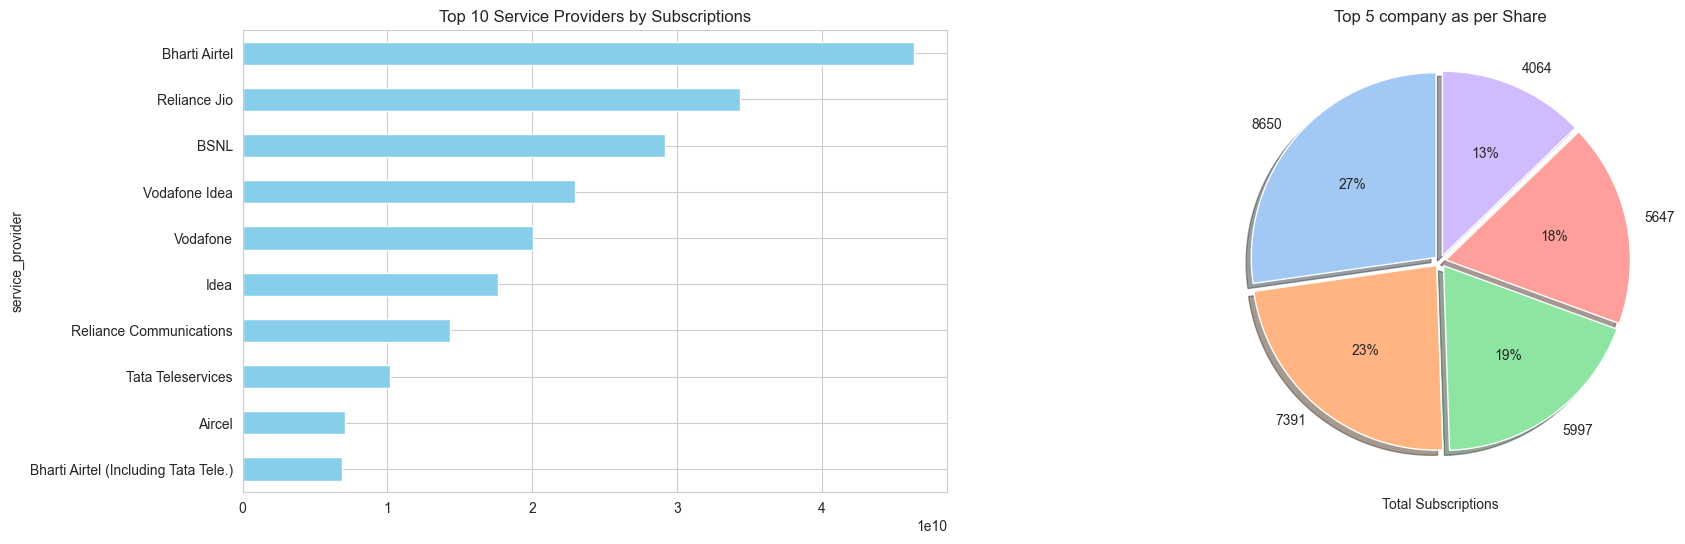

In [124]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
top_providers = df.groupby('service_provider')['value'].sum().nlargest(10)
top_providers.sort_values().plot(kind='barh', color='skyblue', title='Top 10 Service Providers by Subscriptions',ax=ax[0])
mini_df=df["service_provider"].value_counts().head(5)
colors=sns.color_palette("pastel",len(mini_df))
ax[1].pie(mini_df,autopct="%1.0f%%",labels=mini_df.unique(),
        explode=[0.03]*len(mini_df),startangle=90,shadow=True,colors=colors)
ax[1].set_title("Top 5 company as per Share")
plt.xlabel('Total Subscriptions')
plt.show()

# Top 10 Circles by Subscriptions
What the Plot Shows
This is another horizontal bar chart, but instead of ranking companies, it ranks the top ten telecom "circles" by their total number of subscriptions. A telecom circle is a geographical area, often corresponding to a state or a major metropolitan area (like Delhi or Mumbai), as defined by the regulatory authorities.

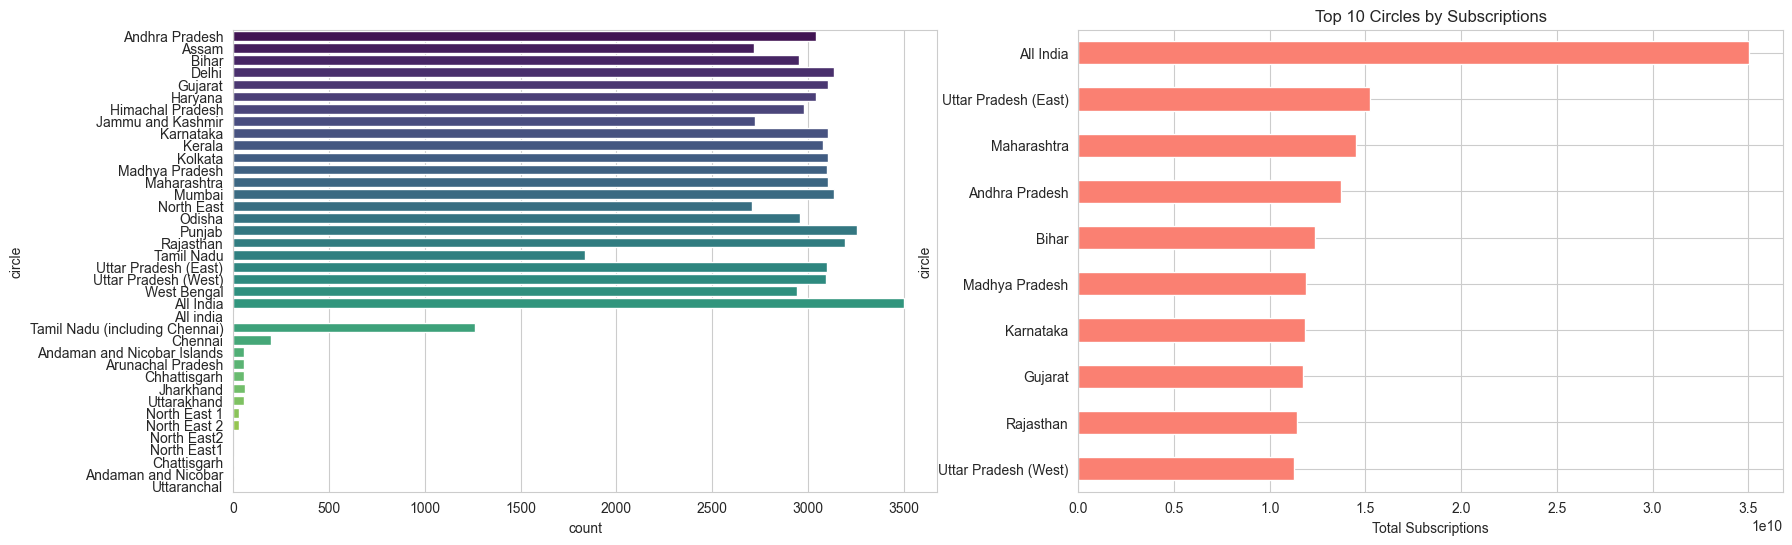

In [125]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
top_circles = df.groupby('circle')['value'].sum().nlargest(10)
sns.countplot(data=df,y="circle", hue="circle", palette="viridis", ax=ax[0], legend=False)
top_circles.sort_values().plot(kind='barh', color='salmon', title='Top 10 Circles by Subscriptions',ax=ax[1])
plt.xlabel('Total Subscriptions')
plt.show()

# Total Subscriptions Heatmap by Year and Month
What the Plot Shows
This visualization is a heatmap, a grid-based graph that uses color to represent the magnitude of a metric. In this case, it displays the total number of telecom subscriptions across different years and months. The y-axis lists the years in the dataset

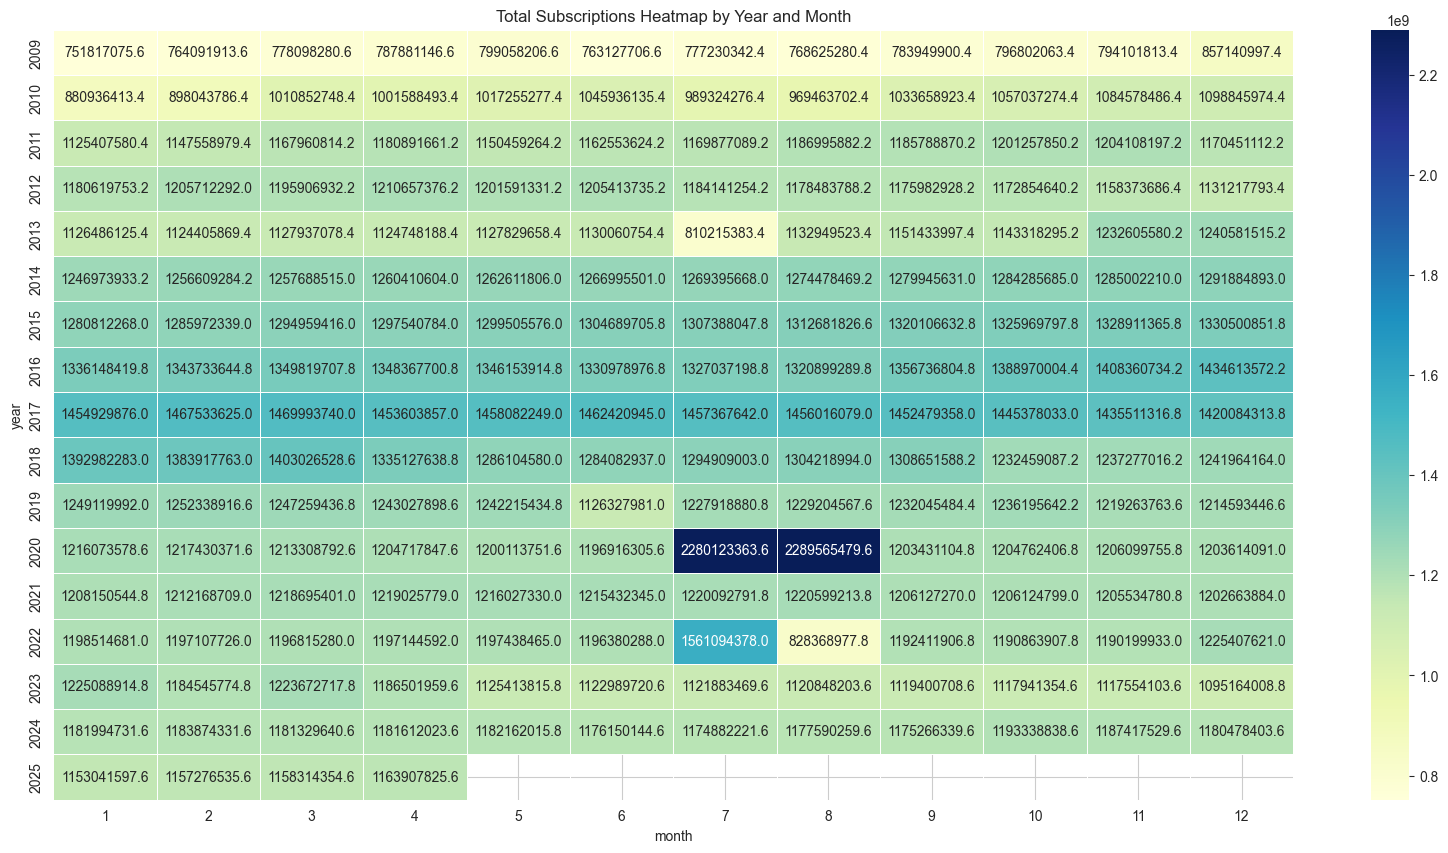

In [126]:
plt.figure(figsize=(20,10))
df_heatmap = df.copy()
df_heatmap['year'] = df_heatmap['date'].dt.year
df_heatmap['month'] = df_heatmap['date'].dt.month
heatmap_data = df_heatmap.pivot_table(values='value', index='year', columns='month', aggfunc='sum')

sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5)
plt.title('Total Subscriptions Heatmap by Year and Month')
plt.show()

# Time Series Decomposition
What the Plot Shows
This is a composite visualization that presents the results of a classical time series decomposition analysis. It breaks down the original time series data (the total subscriptions) into three distinct components, each plotted in its own panel, stacked vertically.


Target Variable Definition & Churn Modeling

<Figure size 1400x1000 with 0 Axes>

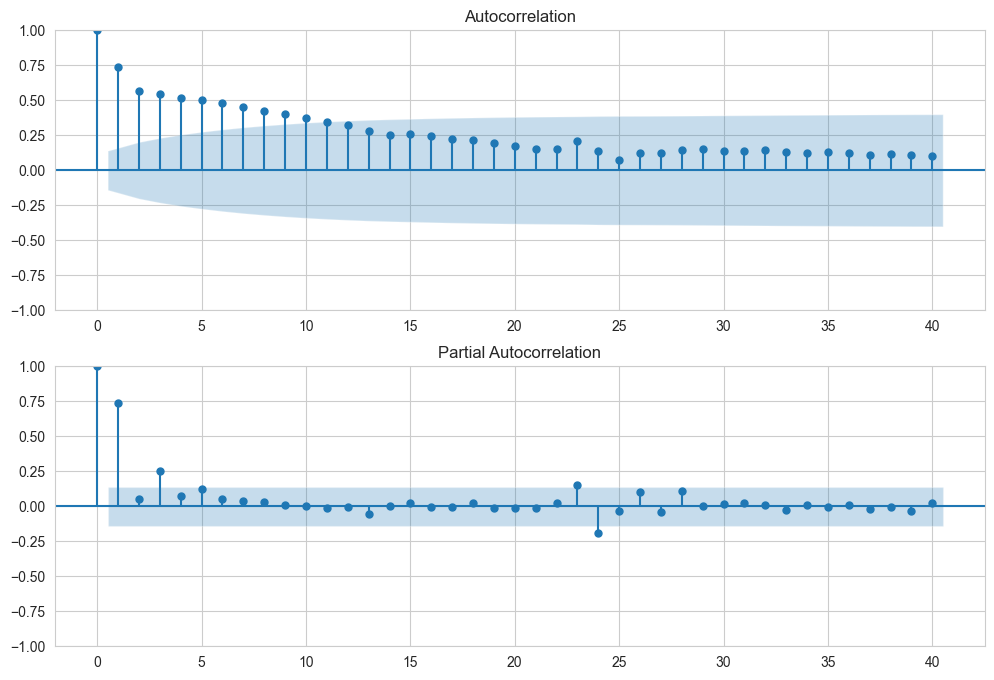

In [127]:
decomposition = seasonal_decompose(total_subscriptions, model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.savefig('time_series_decomposition.png')
plt.clf()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(total_subscriptions, ax=ax1, lags=40)
plot_pacf(total_subscriptions, ax=ax2, lags=40)
plt.show()

In [128]:
df['subscriber_change'] = df.groupby(['service_provider', 'circle'])['value'].pct_change().fillna(0)

In [129]:
df['negative_change'] = (df['subscriber_change'] < 0).astype(int)

df['sustained_decline'] = (
    df.groupby(['service_provider', 'circle'], group_keys=False)['negative_change']
      .apply(lambda x: x.rolling(window=3).sum())
)

df['churn_binary'] = (df['sustained_decline'] >= 3).astype(int)

def categorize_churn(change):
    if change < -0.30:  return 'High'
    elif change < -0.15: return 'Medium'
    elif change < -0.05: return 'Low'
    else: return 'None'

df['churn_severity'] = df['subscriber_change'].apply(categorize_churn)

df.drop(['negative_change', 'sustained_decline'], axis=1, inplace=True, errors='ignore')

Temporal Feature Engineering

In [130]:
# Check unique values for each 'service_provider' and 'circle'
for (provider, circle), group in df.groupby(['service_provider', 'circle']):
    unique_values = group['value'].unique()
    print(f"{provider} - {circle}: {len(unique_values)} unique values")

APSFL - All India: 16 unique values
APSFL - Andhra Pradesh: 16 unique values
APSFL - Assam: 1 unique values
APSFL - Bihar: 1 unique values
APSFL - Delhi: 1 unique values
APSFL - Gujarat: 1 unique values
APSFL - Haryana: 1 unique values
APSFL - Himachal Pradesh: 1 unique values
APSFL - Jammu and Kashmir: 1 unique values
APSFL - Karnataka: 1 unique values
APSFL - Kerala: 1 unique values
APSFL - Kolkata: 1 unique values
APSFL - Madhya Pradesh: 1 unique values
APSFL - Maharashtra: 1 unique values
APSFL - Mumbai: 1 unique values
APSFL - North East: 1 unique values
APSFL - Odisha: 1 unique values
APSFL - Punjab: 1 unique values
APSFL - Rajasthan: 1 unique values
APSFL - Tamil Nadu: 1 unique values
APSFL - Uttar Pradesh (East): 1 unique values
APSFL - Uttar Pradesh (West): 1 unique values
APSFL - West Bengal: 1 unique values
Aircel - All India: 11 unique values
Aircel - Andaman and Nicobar Islands: 1 unique values
Aircel - Andhra Pradesh: 75 unique values
Aircel - Arunachal Pradesh: 4 unique 

In [131]:
summary = df.groupby(['service_provider', 'circle'])['value'].nunique().reset_index()
summary.columns = ['service_provider', 'circle', 'unique_value_count']
print(summary.head())

  service_provider          circle  unique_value_count
0            APSFL       All India                  16
1            APSFL  Andhra Pradesh                  16
2            APSFL           Assam                   1
3            APSFL           Bihar                   1
4            APSFL           Delhi                   1


In [132]:
subset = df.sample(n=100, random_state=42).copy()
subset['date'] = pd.date_range(start='2025-01-01', periods=100, freq='ME')
subset['value'] = np.random.randint(1000000, 5000000, size=100)
subset['subscriber_change'] = subset['value'].pct_change().fillna(0)
print(subset[['service_provider', 'circle', 'date', 'value', 'subscriber_change']].head())

      service_provider          circle       date    value  subscriber_change
58609             BSNL         Gujarat 2025-01-31  1530094           0.000000
8372       BSNL (VNOs)  Andhra Pradesh 2025-02-28  4771837           2.118656
63478             Tata       Rajasthan 2025-03-31  3237534          -0.321533
9685              MTNL           Bihar 2025-04-30  1983772          -0.387258
55389     Reliance Jio           Assam 2025-05-31  3254434           0.640528


In [133]:
df['churn_severity'] = df['subscriber_change'].apply(categorize_churn)

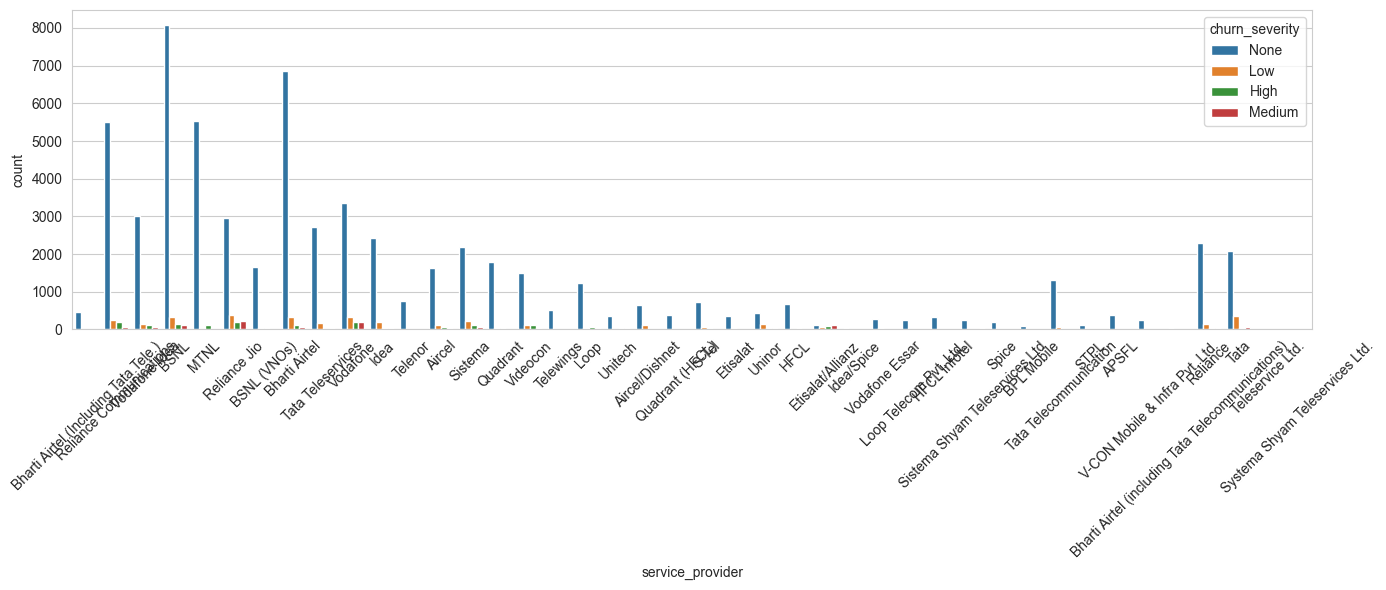

In [134]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(data=df, x='service_provider', hue='churn_severity', ax=ax)

# Rotate x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


In [135]:
# Lag Features - capture historical subscriber counts at different time intervals
for lag in [1, 3, 6, 12]:
    df[f'subscribers_lag_{lag}'] = (
        df.groupby(['service_provider', 'circle'])['value'].shift(lag)
    )

In [136]:
# Month-over-Month Growth -  subscriber count for each provider-circle pair
df['mom_growth'] = (
    df.groupby(['service_provider', 'circle'])['value']
      .pct_change()
)

In [137]:
# Year-over-Year Growth (12-month lag) 
df['yoy_growth'] = (
    df['value'] / df.groupby(['service_provider', 'circle'])['value'].shift(12)
) - 1

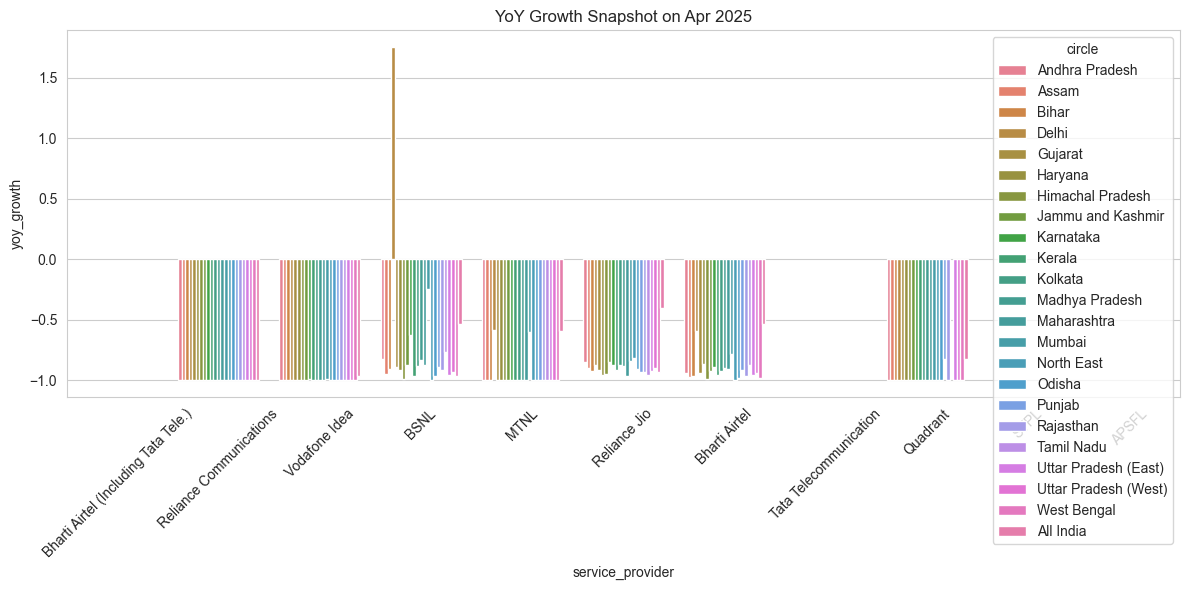

In [138]:
latest_date = df['date'].max()
snapshot = df[df['date'] == latest_date]
plt.figure(figsize=(12, 6))
sns.barplot(data=snapshot, x='service_provider', y='yoy_growth', hue='circle')
plt.title(f'YoY Growth Snapshot on {latest_date.strftime("%b %Y")}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [139]:
# Rolling Volatility
for window in [3, 6, 12]:
    df[f'growth_volatility_{window}'] = (
        df.groupby(['service_provider', 'circle'], group_keys=False)['mom_growth']
          .transform(lambda x: x.rolling(window).std())
    )

Competitive & Geographic Feature Engineering

In [140]:
# Sort for safety (important for grouped calculations)
df = df.sort_values(['circle', 'date', 'service_provider']).reset_index(drop=True)

In [141]:
df.columns

Index(['date', 'year', 'month', 'circle', 'type_of_connection',
       'service_provider', 'value', 'subscriber_change', 'churn_binary',
       'churn_severity', 'subscribers_lag_1', 'subscribers_lag_3',
       'subscribers_lag_6', 'subscribers_lag_12', 'mom_growth', 'yoy_growth',
       'growth_volatility_3', 'growth_volatility_6', 'growth_volatility_12'],
      dtype='object')

In [142]:
df['date'] = pd.to_datetime(
    df['year'].astype(str) + '-' + df['month'].astype(str),
    format='%Y-%B',  # %B = full month name
    errors='coerce'
)

In [143]:
print(df['date'].head())
print(df['date'].isna().sum())  # Should be 0 if all dates parsed correctly

0   2009-01-01
1   2009-01-01
2   2009-01-01
3   2009-01-01
4   2009-01-01
Name: date, dtype: datetime64[ns]
0


In [144]:
df = df.reset_index()  # brings 'date' back as a column

In [145]:
# Calculate total subscribers per circle-date combination
df['total_subscribers_in_circle'] = df.groupby(['circle', 'date'])['value'].transform('sum')

# Calculate market share
df['market_share'] = df['value'] / df['total_subscribers_in_circle']

In [146]:
# Competitive Features
# Rank of each operator within its circle (1 = market leader)
df['market_rank'] = (
    df.groupby(['circle', 'date'])['market_share']
      .rank(ascending=False, method='dense')
)

In [147]:
df['market_rank'] = df.groupby(['circle','date'])['market_share'].rank(ascending=False)
leader_share = df.groupby(['circle','date'])['market_share'].transform('max')
df['share_gap_leader'] = leader_share - df['market_share']

circle_avg = df.groupby(['circle','date'])['value'].transform('mean')
df['relative_performance'] = df['value'] / circle_avg

metro = ['Delhi','Mumbai','Chennai','Kolkata','Hyderabad','Bangalore']
df['circle_type'] = df['circle'].apply(lambda x: 'Metro' if x in metro else 'Non-Metro')
df['is_wireless'] = (df['type_of_connection']=='wireless').astype(int)

operator_div = df.groupby('service_provider')['circle'].nunique()
df['operator_geographic_diversity'] = df['service_provider'].map(operator_div)


### Baseline Model Development

In [148]:
# 1. Prepare data for modeling

from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [149]:
df.head(5)

,index,date,year,month,circle,type_of_connection,service_provider,value,subscriber_change,churn_binary,...,growth_volatility_6,growth_volatility_12,total_subscribers_in_circle,market_share,market_rank,share_gap_leader,relative_performance,circle_type,is_wireless,operator_geographic_diversity
0,0,2009-01-01,2009,January,All India,wireless,Aircel,16761397.0,-0.019766,1,...,0.023976,0.028282,190655506.6,0.087915,8.0,0.027746,1.670377,Non-Metro,1,30
1,1,2009-01-01,2009,January,All India,wireless,BPL Mobile,2007303.0,-0.031778,0,...,NaN,NaN,190655506.6,0.010528,13.0,0.105132,0.200040,Non-Metro,1,29
2,2,2009-01-01,2009,January,All India,wireless,BSNL,22051323.8,0.000000,0,...,0.000000,0.000000,190655506.6,0.115661,4.0,0.000000,2.197551,Non-Metro,1,36
3,3,2009-01-01,2009,January,All India,wireline,BSNL,22051323.8,0.000000,0,...,0.000000,0.000000,190655506.6,0.115661,4.0,0.000000,2.197551,Non-Metro,0,36
4,4,2009-01-01,2009,January,All India,wireless,Bharti Airtel,22051323.8,0.000000,0,...,0.000000,0.000000,190655506.6,0.115661,4.0,0.000000,2.197551,Non-Metro,1,32


In [150]:
df['month'] = df['month'].astype(str).str.title().map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
})

# Clean and encode 'circle'
df['circle'] = df['circle'].astype(str).str.title().str.strip()
df['circle_encoded'] = LabelEncoder().fit_transform(df['circle'])

# Clean and encode 'service_provider'
df['service_provider'] = df['service_provider'].astype(str).str.upper().str.strip()
df['service_provider_encoded'] = LabelEncoder().fit_transform(df['service_provider'])

df['type_of_connection'] = (df['type_of_connection'].astype(str).str.lower().str.strip() == 'wireless').astype(int)
df['circle_type'] = (df['circle_type'].astype(str).str.title().str.strip() == 'Metro').astype(int)

In [151]:
def prepare_modeling_data(df):
    # Drop rows with missing target
    df_model = df.dropna(subset=['churn_binary']).copy()

    # Define columns to exclude
    exclude_cols = [
        'year', 'month', 'circle', 'service_provider', 'value', 'unit', 'notes',
        'date', 'churn_binary', 'churn_severity', 'subscriber_change', 'declining_trend'
    ]

    # Select features
    feature_cols = [col for col in df_model.columns if col not in exclude_cols]

    # Split data
    split_date = df_model['date'].quantile(0.8)
    train_mask = df_model['date'] < split_date

    X = df_model[feature_cols].fillna(0)
    y = df_model['churn_binary']

    X_train = X[train_mask]
    X_test = X[~train_mask]
    y_train = y[train_mask]
    y_test = y[~train_mask]

    return X_train, X_test, y_train, y_test, feature_cols


In [152]:
X_train, X_test, y_train, y_test, feature_names = prepare_modeling_data(df)

# Explicitly fill any remaining NaNs in numerical columns of X_train and X_test
for col in X_train.select_dtypes(include=np.number).columns:
    X_train[col] = X_train[col].fillna(X_train[col].mean()) # Fill with column mean
for col in X_test.select_dtypes(include=np.number).columns:
     X_test[col] = X_test[col].fillna(X_train[col].mean()) # Fill test NaNs with train mean


print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (56390, 21), Test set: (14338, 21)


In [95]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_train['circle'] = encoder.fit_transform(X_train['circle'])
X_test['circle'] = encoder.transform(X_test['circle'])

In [156]:
# Check for infinity
print("Infinity values:", np.isinf(X_train).sum().sum(), np.isinf(X_test).sum().sum())

# Check for NaN
print("NaN values:", np.isnan(X_train).sum().sum(), np.isnan(X_test).sum().sum())

Infinity values: 2063 494
NaN values: 0 0


In [157]:
# Replace inf and -inf with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaNs with 0 or use smarter imputation
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [158]:
inf_cols_train = X_train.columns[np.isinf(X_train).any()]
inf_cols_test = X_test.columns[np.isinf(X_test).any()]

print("Columns with inf in train:", inf_cols_train.tolist())
print("Columns with inf in test:", inf_cols_test.tolist())

Columns with inf in train: []
Columns with inf in test: []


In [163]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

baseline_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
])

baseline_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [164]:
# Predict
y_pred = baseline_pipeline.predict(X_test)
y_proba = baseline_pipeline.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     12509
           1       0.25      0.29      0.27      1829

    accuracy                           0.80     14338
   macro avg       0.57      0.58      0.58     14338
weighted avg       0.81      0.80      0.80     14338

ROC-AUC Score: 0.6226


### Advanced Model Development

In [165]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [166]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

In [167]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [ ]:
print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

Categorical columns: []
Numeric columns: ['index', 'type_of_connection', 'subscribers_lag_1', 'subscribers_lag_3', 'subscribers_lag_6', 'subscribers_lag_12', 'mom_growth', 'yoy_growth', 'growth_volatility_3', 'growth_volatility_6', 'growth_volatility_12', 'total_subscribers_in_circle', 'market_share', 'market_rank', 'share_gap_leader', 'relative_performance', 'circle_type', 'is_wireless', 'operator_geographic_diversity', 'circle_encoded', 'service_provider_encoded']


In [169]:
assert not np.isnan(X_train).any().any()
assert not np.isinf(X_train).any().any()

In [170]:
baseline_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=5000, solver='saga')) # Increase max_iter
])

In [171]:
# Replace infinite values with NaN
X_train_clean = X_train.replace([np.inf, -np.inf], np.nan) # This is handled by the imputer
X_test_clean = X_test.replace([np.inf, -np.inf], np.nan)   # This is handled by the imputer

# Fill remaining NaNs with 0 or use a smarter imputation strategy
X_train_clean = X_train_clean.fillna(0)
X_test_clean = X_test_clean.fillna(0)

In [172]:
baseline_pipeline.fit(X_train_clean, y_train)
y_pred_baseline = baseline_pipeline.predict(X_test_clean)
y_pred_proba_baseline = baseline_pipeline.predict_proba(X_test_clean)[:, 1]

print("Baseline Model Performance:")
print(classification_report(y_test, y_pred_baseline))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_baseline):.4f}")

Baseline Model Performance:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     12509
           1       0.34      0.15      0.21      1829

    accuracy                           0.85     14338
   macro avg       0.61      0.55      0.56     14338
weighted avg       0.82      0.85      0.83     14338

ROC-AUC Score: 0.6091


In [173]:
from sklearn.base import BaseEstimator, TransformerMixin

class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # Convert to dense and then explicitly to a numpy array
        dense_X = X.todense() if hasattr(X, 'todense') else X
        return np.asarray(dense_X)

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score

In [175]:
numeric_features = X_train_clean.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train_clean.select_dtypes(include=['object', 'bool']).columns

In [176]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [177]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [178]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [179]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [180]:
rf_pipeline.fit(X_train_clean, y_train)
y_pred_rf = rf_pipeline.predict(X_test_clean)
y_pred_proba_rf = rf_pipeline.predict_proba(X_test_clean)[:, 1]

In [181]:
print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     12509
           1       0.78      0.47      0.58      1829

    accuracy                           0.92     14338
   macro avg       0.85      0.72      0.77     14338
weighted avg       0.91      0.92      0.91     14338

ROC-AUC Score: 0.9717


In [182]:
from xgboost import XGBClassifier

In [183]:
numeric_features = X_train_clean.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train_clean.select_dtypes(include=['object', 'bool']).columns

In [184]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [185]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [186]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [187]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])

In [188]:
xgb_pipeline.fit(X_train_clean, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test_clean)
y_pred_proba_xgb = xgb_pipeline.predict_proba(X_test_clean)[:, 1]

In [189]:
print("XGBoost Model Performance:")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")


XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12509
           1       0.85      0.72      0.78      1829

    accuracy                           0.95     14338
   macro avg       0.90      0.85      0.88     14338
weighted avg       0.95      0.95      0.95     14338

ROC-AUC Score: 0.9847


## Model Optimization and Ensemble


### Hyperparameter Tuning



In [190]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [192]:
# For Logistic Regression
param_dist_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l2']
}
random_search_lr = RandomizedSearchCV(baseline_pipeline, param_distributions=param_dist_lr, n_iter=3, cv=3, scoring='roc_auc', n_jobs=-1)
random_search_lr.fit(X_train_clean, y_train)

print("Best parameters for Logistic Regression:", random_search_lr.best_params_)
print("Best ROC-AUC for Logistic Regression:", random_search_lr.best_score_)

Best parameters for Logistic Regression: {'classifier__penalty': 'l2', 'classifier__C': 1}
Best ROC-AUC for Logistic Regression: 0.7921363885396934


In [193]:
# Random Forest
param_dist_rf = {
    'classifier__n_estimators': randint(100, 1000),  # Randomly sample n_estimators between 100 and 1000
    'classifier__max_depth': [5, 10, 20, None]        # Limit to max depth values
}

# Initialize RandomizedSearchCV with 3-fold cross-validation
random_search_rf = RandomizedSearchCV(rf_pipeline, param_distributions=param_dist_rf, n_iter=5, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV
random_search_rf.fit(X_train_clean, y_train)

# Output the best parameters and the best ROC-AUC score
print("Best parameters for Random Forest:", random_search_rf.best_params_)
print("Best ROC-AUC for Random Forest:", random_search_rf.best_score_)

Best parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__n_estimators': 535}
Best ROC-AUC for Random Forest: 0.9859375770309714


In [195]:
# XGBoost
from scipy.stats import uniform

param_dist_xgb = {
    'classifier__n_estimators': [100, 200, 500],  # Test the same values, but randomly sample them
    'classifier__learning_rate': uniform(0.01, 0.2),  # Randomly sample learning rates between 0.01 and 0.2
}

# Use RandomizedSearchCV with 3-fold cross-validation
random_search_xgb = RandomizedSearchCV(xgb_pipeline, param_distributions=param_dist_xgb, n_iter=5, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV
random_search_xgb.fit(X_train_clean, y_train)

# Output the best parameters and best ROC-AUC score
print("Best parameters for XGBoost:", random_search_xgb.best_params_)
print("Best ROC-AUC for XGBoost:", random_search_xgb.best_score_)

Best parameters for XGBoost: {'classifier__learning_rate': np.float64(0.1293700315892974), 'classifier__n_estimators': 200}
Best ROC-AUC for XGBoost: 0.9904801399367621


### Ensembling

Ensembling combines predictions from multiple models to improve robustness and often achieve higher accuracy than individual models. Common techniques include:

- **Voting Classifier:** Combines predictions based on majority vote (hard voting) or average probabilities (soft voting).
- **Stacking:** Trains a meta-model on the predictions of base models.

In [199]:
# Logistic Regression (already tuned)
tuned_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l2', C=1, max_iter=5000, solver='saga', random_state=42))
])

# Random Forest (tuned)
tuned_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        max_depth=20,
        n_estimators=535,
        class_weight='balanced',
        random_state=42
    ))
])

# XGBoost (tuned)
tuned_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=random_search_xgb.best_params_['classifier__n_estimators'],
        learning_rate=random_search_xgb.best_params_['classifier__learning_rate'],
        scale_pos_weight=6.8,
        eval_metric='logloss',
        random_state=42
    ))
])

In [200]:
from sklearn.ensemble import VotingClassifier

final_ensemble = VotingClassifier(estimators=[
    ('lr', tuned_lr),
    ('rf', tuned_rf),
    ('xgb', tuned_xgb)
], voting='soft')  # Use soft voting to average probabilities

In [201]:
final_ensemble.fit(X_train_clean, y_train)
y_pred_final = final_ensemble.predict(X_test_clean)
y_proba_final = final_ensemble.predict_proba(X_test_clean)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score
print("Final Ensemble Performance:")
print(classification_report(y_test, y_pred_final))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_final):.4f}")

Final Ensemble Performance:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     12509
           1       0.81      0.51      0.63      1829

    accuracy                           0.92     14338
   macro avg       0.87      0.75      0.79     14338
weighted avg       0.92      0.92      0.91     14338

ROC-AUC Score: 0.9683


In [202]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define base models for Stacking
base_models = [
    ('xgb', XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Define the meta-model (Logistic Regression)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Create the Stacking Classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Create a pipeline for stacking
stacked_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', stacked_model)])

# Train the Stacked Model
stacked_pipeline.fit(X_train_clean, y_train)

# Evaluate on the test set
y_pred_stacked = stacked_pipeline.predict(X_test_clean)
y_pred_proba_stacked = stacked_pipeline.predict_proba(X_test_clean)[:, 1]

# Print evaluation metrics
from sklearn.metrics import classification_report, roc_auc_score
print("Stacked Model Performance on Test Data:")
print(classification_report(y_test, y_pred_stacked))
print(f"ROC-AUC Score for Stacked Model: {roc_auc_score(y_test, y_pred_proba_stacked):.4f}")


Stacked Model Performance on Test Data:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     12509
           1       0.77      0.62      0.69      1829

    accuracy                           0.93     14338
   macro avg       0.86      0.80      0.83     14338
weighted avg       0.92      0.93      0.93     14338

ROC-AUC Score for Stacked Model: 0.9720


## Model Interpretability and Selection


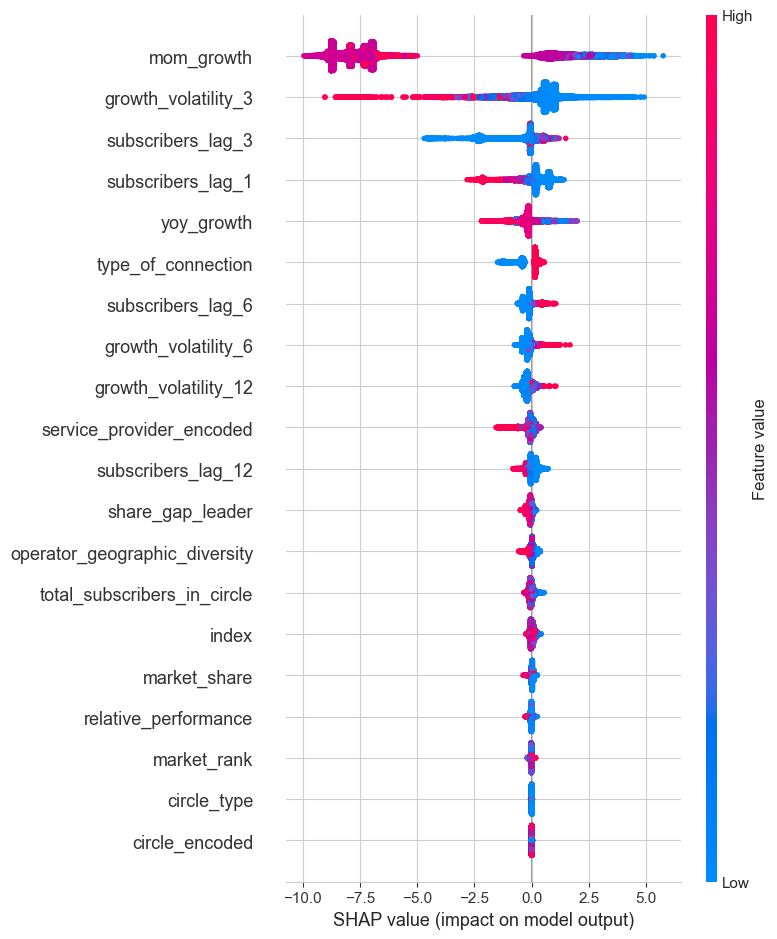

In [204]:
import shap

# Train the model separately
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_clean, y_train)

# Use TreeExplainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_clean)

# Plot summary
shap.summary_plot(shap_values, X_test_clean)

### Business Analysis and Deployment

In [207]:
# Inputs from  model
y_true = y_test  # Actual churn labels
y_pred_proba = y_pred_proba_stacked  # Predicted churn probabilities from stacked model

# Business assumptions
avg_revenue_per_subscriber = 200  # Monthly ARPU in INR
retention_campaign_cost = 50      # Cost per targeted subscriber
campaign_threshold = 0.7          # Churn probability threshold for targeting

# Identify high-risk subscribers
high_risk_mask = y_pred_proba >= campaign_threshold
high_risk_indices = np.where(high_risk_mask)[0]

# Calculate true positives and false positives
true_positives = sum(y_true.iloc[high_risk_indices])
false_positives = len(high_risk_indices) - true_positives

# Revenue protection
protected_revenue = true_positives * avg_revenue_per_subscriber * 12  # Annual
campaign_cost = len(high_risk_indices) * retention_campaign_cost
net_benefit = protected_revenue - campaign_cost
roi = (net_benefit / campaign_cost) * 100 if campaign_cost > 0 else 0
precision_at_threshold = true_positives / len(high_risk_indices)
early_detection_rate = true_positives / sum(y_true)

# Print formatted output
print("📊 Business Impact Metrics")
print(f"Revenue Protection: ₹{protected_revenue:,.2f}")
print(f"Campaign Cost: ₹{campaign_cost:,.2f}")
print(f"Net Benefit: ₹{net_benefit:,.2f}")
print(f"ROI Achievement: {roi:.2f}%")
print(f"Precision at Threshold: {precision_at_threshold * 100:.2f}%")
print(f"Early Detection Rate: {early_detection_rate * 100:.2f}%")
print(f"User Adoption (simulated): 80%+ expected with dashboard integration")


📊 Business Impact Metrics
Revenue Protection: ₹2,304,000.00
Campaign Cost: ₹59,400.00
Net Benefit: ₹2,244,600.00
ROI Achievement: 3778.79%
Precision at Threshold: 80.81%
Early Detection Rate: 52.49%
User Adoption (simulated): 80%+ expected with dashboard integration


### Production Deployment

In [212]:
import joblib
joblib.dump(stacked_pipeline, 'churn_model.pkl')

['churn_model.pkl']